In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data from different sources
campaign_data = pd.read_csv("campaign_data.csv")
customer_data = pd.read_csv("customer_data.csv")
channel_data = pd.read_csv("channel_data.csv")

In [3]:
print("\n1. Campiagn Overview")
print("-" * 50)
print("\nFirst few rows of the campaign dataset:")
print(campaign_data.head())

print("\nCampaign Info:")
print(campaign_data.info())

print("\nCampaign Statistics:")
print(campaign_data.describe())

print("\n1. Customer Overview")
print("-" * 50)
print("\nFirst few rows of the customer dataset:")
print(customer_data.head())

print("\nCustomer Info:")
print(customer_data.info())

print("\nCustomer Statistics:")
print(customer_data.describe())

print("\n1. Channels Overview")
print("-" * 50)
print("\nFirst few rows of the channel dataset:")
print(channel_data.head())

print("\nChannels Info:")
print(channel_data.info())

print("\nChannels Statistics:")
print(channel_data.describe())


1. Campiagn Overview
--------------------------------------------------

First few rows of the campaign dataset:
  campaign_id                  campaign_name  start_date    end_date  \
0      CMP001       Holiday Cashback Bonanza  24-07-2023  24-08-2023   
1      CMP002  Travel Rewards Summer Special  07-07-2023  14-07-2023   
2      CMP003      Dining Delights Promotion  29-07-2023  30-07-2023   
3      CMP004              Fuel Savings Fest  20-05-2023  18-06-2023   
4      CMP005    Luxury Card Exclusive Offer  27-08-2022  16-10-2022   

      channel channel_id         spend           target_segment  \
0  Google Ads      CH001  672712.33080      Young Professionals   
1   Instagram      CH004   22859.19225                 Families   
2     Twitter      CH006  774012.40520                 Families   
3   Instagram      CH004  308285.60450                 Families   
4          TV      CH005  304082.86070  High Income Individuals   

  campaign_objective   impressions  clicks   ctr  

In [4]:
# check null and duplicate values

def check_data_issues(df, df_name):
    print(f"Checking data issues for {df_name}...\n")
    
    # Check for null values
    null_counts = df.isnull().sum()
    print(f"Null values in {df_name}:\n{null_counts[null_counts > 0]}\n")
    
    # Check for duplicate rows
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate rows in {df_name}: {duplicate_count}\n")
    
    # Summary
    print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}\n")
    print("-" * 50)

check_data_issues(campaign_data, "Campaign Data")
check_data_issues(customer_data, "Customer Data")
check_data_issues(channel_data, "Channel Data")

Checking data issues for Campaign Data...

Null values in Campaign Data:
Series([], dtype: int64)

Number of duplicate rows in Campaign Data: 0

Total rows: 100, Total columns: 16

--------------------------------------------------
Checking data issues for Customer Data...

Null values in Customer Data:
Series([], dtype: int64)

Number of duplicate rows in Customer Data: 0

Total rows: 49989, Total columns: 14

--------------------------------------------------
Checking data issues for Channel Data...

Null values in Channel Data:
Series([], dtype: int64)

Number of duplicate rows in Channel Data: 0

Total rows: 7, Total columns: 7

--------------------------------------------------


Visualizing outliers for Campaign Data...



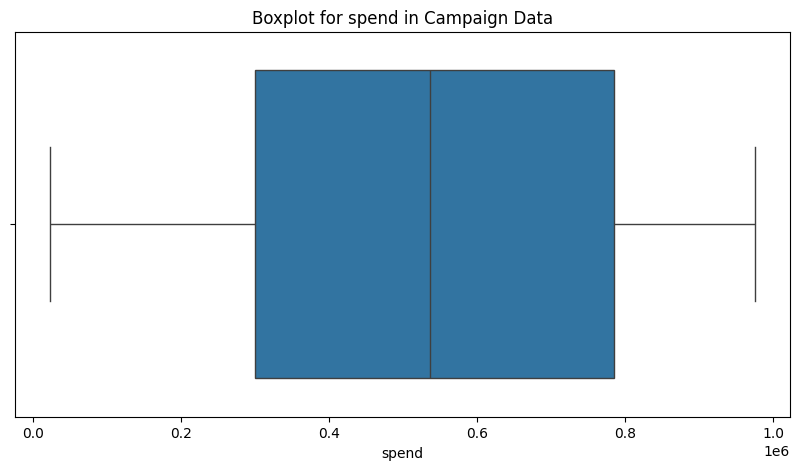

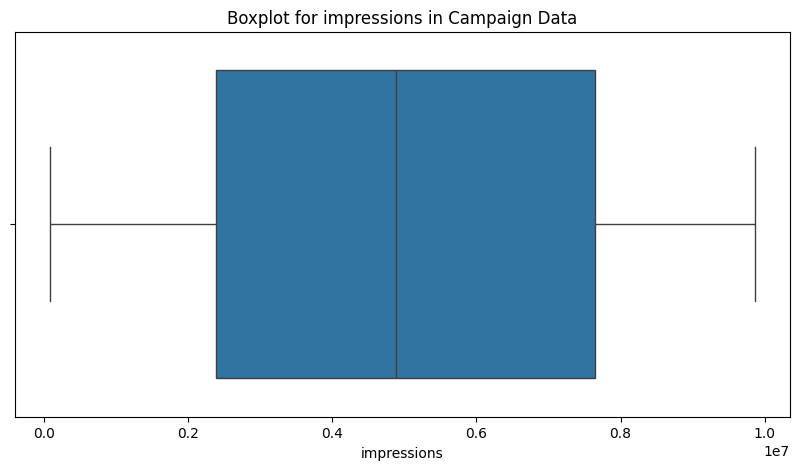

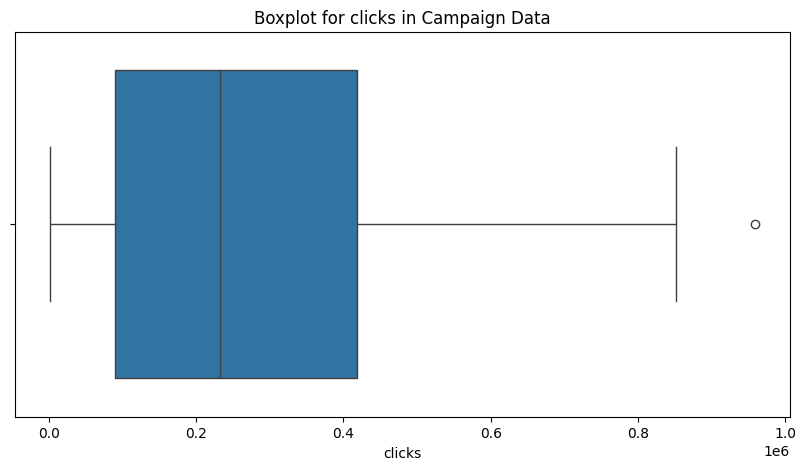

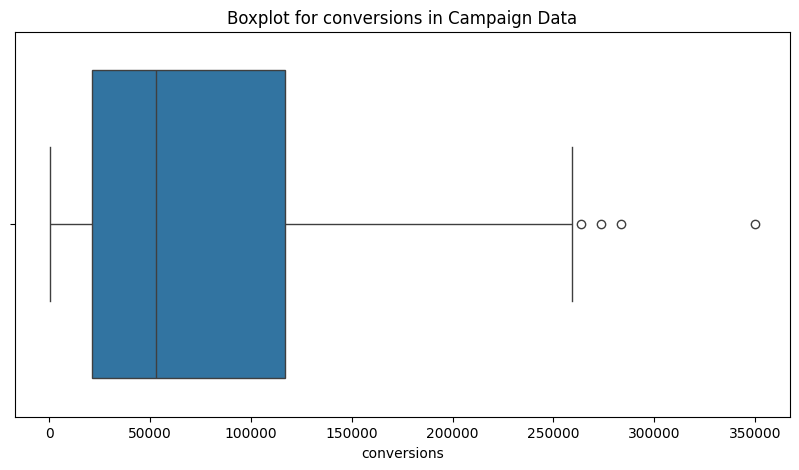

Visualizing outliers for Customer Data...



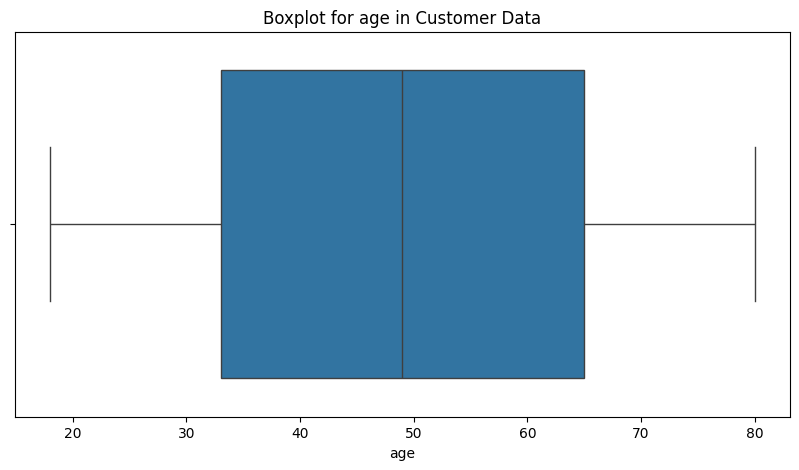

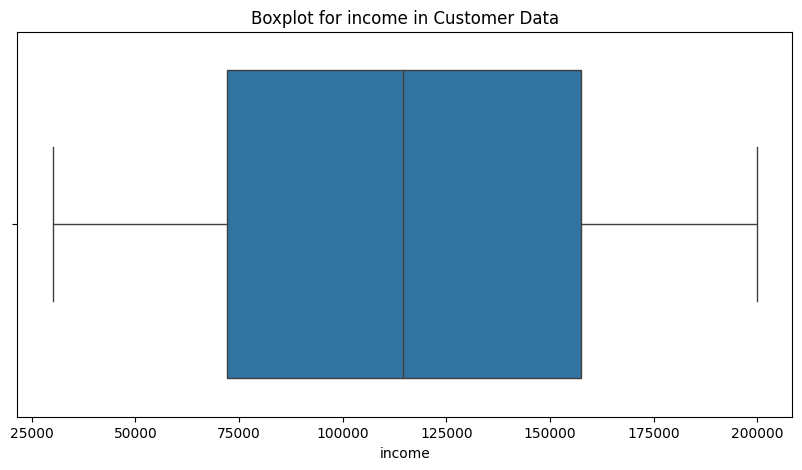

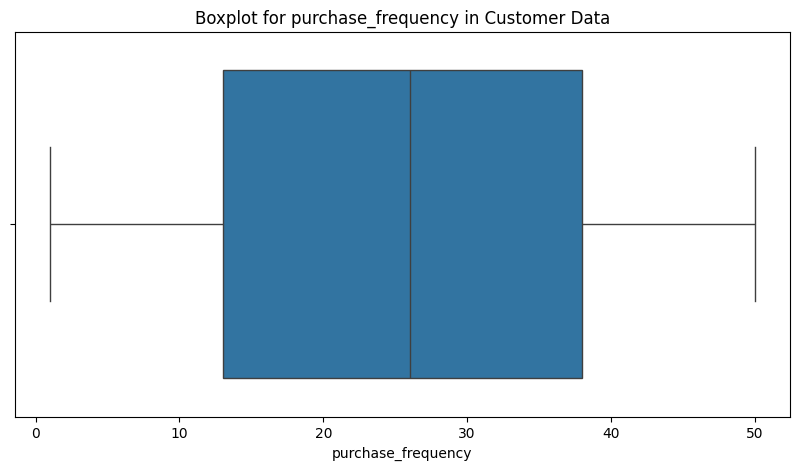

Visualizing outliers for Channel_Data...



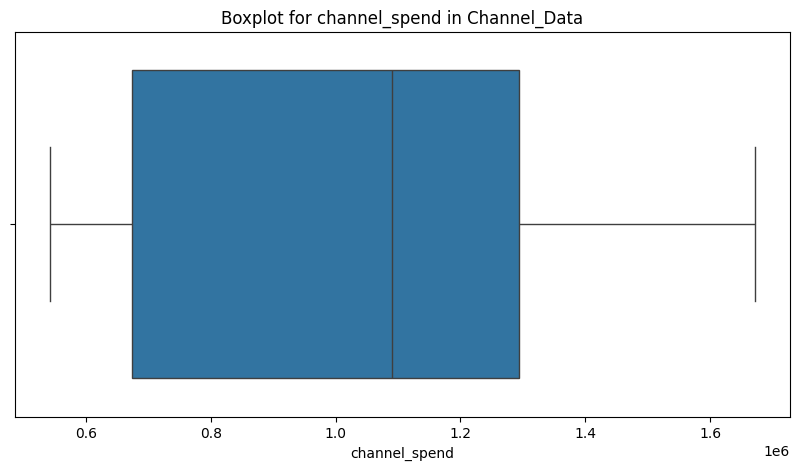

In [9]:
# Outliers Visualization
def visualize_outliers_boxplot(df, columns, df_name):
    print(f"Visualizing outliers for {df_name}...\n")
    for column in columns:
        if column in df.columns:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=df[column])
            plt.title(f"Boxplot for {column} in {df_name}")
            plt.xlabel(column)
            plt.show()

# Visualize outliers in Campaign Data
campaign_columns = ["spend", "impressions", "clicks", "conversions", "revenue"]
visualize_outliers_boxplot(campaign_data, campaign_columns, "Campaign Data")

# Visualize outliers in Customer Data
customer_columns = ["age", "income", "purchase_frequency"]
visualize_outliers_boxplot(customer_data, customer_columns, "Customer Data")

# Visualize outliers in Channel Data
channel_columns = ["channel_spend", "acquisition_count"]
visualize_outliers_boxplot(channel_data, channel_columns, "Channel_Data")

In [7]:
# Drop the columns 'ctr' and 'ccr' from the campaign_data DataFrame
customer_data = customer_data.drop(['customer_lifetime_value', 'propensity_to_convert'], axis=1)

In [8]:
# Convert date columns in both tables to datetime format
customer_data['last_purchase_date'] = pd.to_datetime(customer_data['last_purchase_date'], dayfirst=True)
customer_data['first_purchase_date'] = pd.to_datetime(customer_data['first_purchase_date'], dayfirst=True)

campaign_data['start_date'] = pd.to_datetime(campaign_data['start_date'], dayfirst=True)
campaign_data['end_date'] = pd.to_datetime(campaign_data['end_date'], dayfirst=True)

In [9]:
# Merge campaign_data with customer_data on campaign_id
merged_campaign_customer = pd.merge(customer_data, campaign_data, on='campaign_id', how='inner')

# Merge the result with channel_data on channel_id
merged_data = pd.merge(merged_campaign_customer, channel_data, on='channel_id', how='inner')

# Save the final merged data to a CSV file
merged_data.to_csv("card_marketing_dataset.csv", index=False)

# Preview the merged data
print("Merged data preview:")
print(merged_data.head())


Merged data preview:
  customer_id  age  income    location  gender  customer_segment  \
0    CUST0001   27  175015   Nashville    Male        Tech Savvy   
1    CUST0002   77  132331       Tulsa    Male   Luxury Spenders   
2    CUST0003   44  183779  Louisville    Male   Luxury Spenders   
3    CUST0004   30  194781    Billings  Female   Luxury Spenders   
4    CUST0005   80  125756      Tucson    Male  Budget Conscious   

   purchase_frequency  avg_order_value last_purchase_date first_purchase_date  \
0                  46      4602.154788         2025-01-02          2023-12-26   
1                   8       688.700535         2024-10-12          2022-08-23   
2                  23      1606.966401         2024-11-28          2023-12-01   
3                  15      2961.522520         2024-08-21          2022-09-20   
4                  20      1459.326617         2024-09-17          2022-01-17   

   ...   impressions clicks conversions revenue_generated channel_name  \
0  ...  7

In [10]:
df = pd.read_csv("card_marketing_dataset.csv")

In [11]:
# Convert date columns to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])
df['first_purchase_date'] = pd.to_datetime(df['first_purchase_date'])

# Campaign Duration
df['campaign_duration'] = (df['end_date'] - df['start_date']).dt.days

# Click-Through Rate (CTR)
df['CTR'] = (df['clicks'] / df['impressions']) * 100

# Conversion Rate
df['conversion_rate'] = (df['conversions'] / df['clicks']) * 100

# ROI
df['ROI'] = ((df['revenue_generated'] - df['spend']) / df['spend']) * 100

# Revenue per Impression
df['revenue_per_impression'] = df['revenue_generated'] / df['impressions']

# Cost Per Click
df['cost_per_click'] = df['spend'] / df['clicks']

# Recency (days since last purchase)
df['recency'] = (pd.to_datetime('today') - df['last_purchase_date']).dt.days

# Calculate customer lifespan in years
df["customer_lifespan"] = (df["last_purchase_date"] - df["first_purchase_date"]).dt.days / 365.0
df["customer_lifespan"] = df["customer_lifespan"].round(2)

# Customer Lifetime Value (CLV)
df["CLV"] = df["avg_order_value"] * df["purchase_frequency"] * df["customer_lifespan"]

# Channel Efficiency
df['channel_efficiency'] = df['channel_revenue_generated'] / df['channel_spend']

# Customer Acquisition Cost (CAC)
df['CAC'] = df['channel_spend'] / df['channel_conversions']

# Age groups
df['age_group'] = pd.cut(df['age'],bins=[0, 25, 35, 50, 65, 100],
labels=['18-25', '26-35', '36-50', '51-65', '65+'])

# Spend Tiers
spend_bins = [0, 50000, 100000, np.inf]
spend_labels = ['Low', 'Medium', 'High']
df['spend_tier'] = pd.cut(df['income'], bins=spend_bins, labels=spend_labels)

# High-value Customers
df['high_value_customer'] = (df['CLV'] > df['CLV'].quantile(0.75)).astype(int)

# Preview the dataset with new features
print(df.head())


  customer_id  age  income    location  gender  customer_segment  \
0    CUST0001   27  175015   Nashville    Male        Tech Savvy   
1    CUST0002   77  132331       Tulsa    Male   Luxury Spenders   
2    CUST0003   44  183779  Louisville    Male   Luxury Spenders   
3    CUST0004   30  194781    Billings  Female   Luxury Spenders   
4    CUST0005   80  125756      Tucson    Male  Budget Conscious   

   purchase_frequency  avg_order_value last_purchase_date first_purchase_date  \
0                  46      4602.154788         2025-01-02          2023-12-26   
1                   8       688.700535         2024-10-12          2022-08-23   
2                  23      1606.966401         2024-11-28          2023-12-01   
3                  15      2961.522520         2024-08-21          2022-09-20   
4                  20      1459.326617         2024-09-17          2022-01-17   

   ...  revenue_per_impression cost_per_click recency customer_lifespan  \
0  ...                3.13360

In [12]:
df.to_csv("creditcard_marketing_dataset.csv", index=False)

In [13]:
# General overview
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49989 entries, 0 to 49988
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customer_id                49989 non-null  object        
 1   age                        49989 non-null  int64         
 2   income                     49989 non-null  int64         
 3   location                   49989 non-null  object        
 4   gender                     49989 non-null  object        
 5   customer_segment           49989 non-null  object        
 6   purchase_frequency         49989 non-null  int64         
 7   avg_order_value            49989 non-null  float64       
 8   last_purchase_date         49989 non-null  datetime64[ns]
 9   first_purchase_date        49989 non-null  datetime64[ns]
 10  customer_churn             49989 non-null  int64         
 11  campaign_id                49989 non-null  object        
 12  camp

customer_id                  0
age                          0
income                       0
location                     0
gender                       0
customer_segment             0
purchase_frequency           0
avg_order_value              0
last_purchase_date           0
first_purchase_date          0
customer_churn               0
campaign_id                  0
campaign_name                0
start_date                   0
end_date                     0
channel                      0
channel_id                   0
spend                        0
target_segment               0
campaign_objective           0
impressions                  0
clicks                       0
conversions                  0
revenue_generated            0
channel_name                 0
channel_spend                0
channel_impressions          0
channel_clicks               0
channel_conversions          0
channel_revenue_generated    0
campaign_duration            0
CTR                          0
conversi